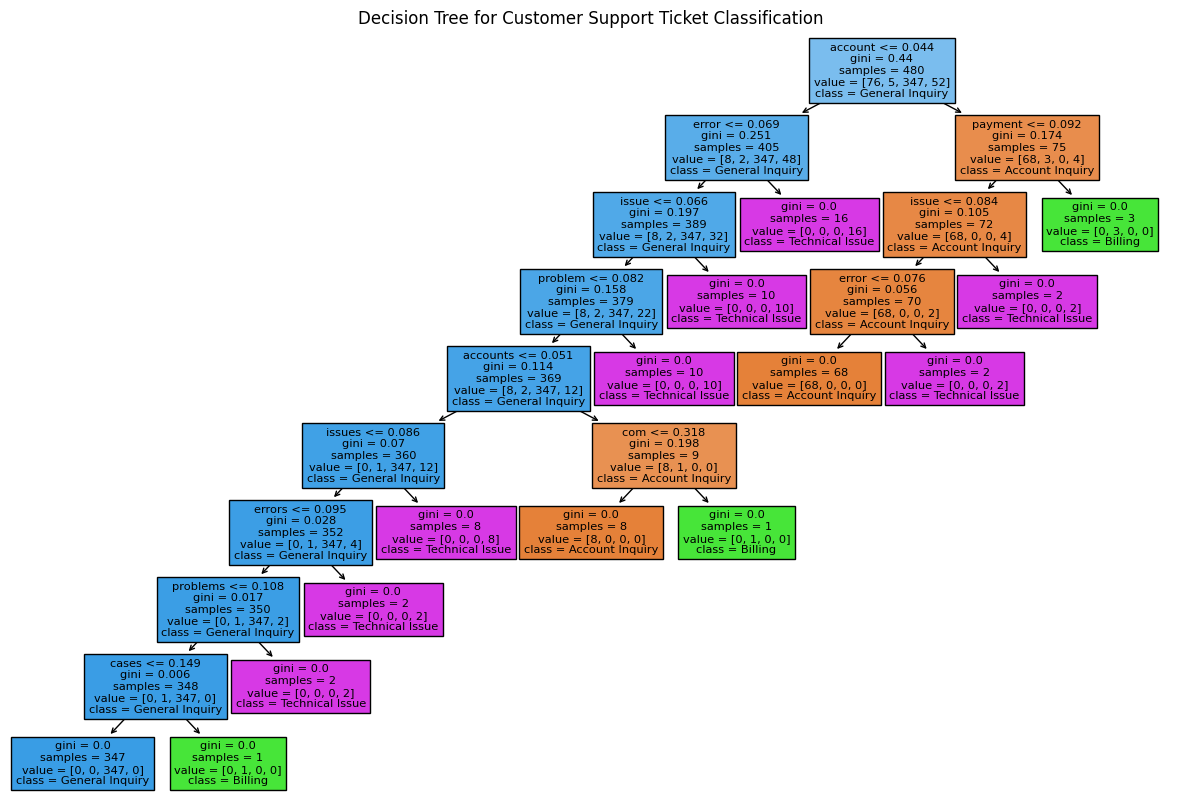

Model Accuracy: 98.06%


In [ ]:
# Import necessary libraries
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the JSON file
file_path = 'dev.json'  # Replace with your file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract messages from JSON
messages = []
for item in data:
    for content in item.get('dialogContent', []):
        messages.append(content['message'])

# Convert to DataFrame
df = pd.DataFrame(messages, columns=['text'])

# Preprocess the textual data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'].fillna('')).toarray()

# Assign mock categories based on keywords in the text
categories = []
for text in df['text']:
    if any(word in text.lower() for word in ['error', 'issue', 'problem']):
        categories.append('Technical Issue')
    elif any(word in text.lower() for word in ['payment', 'billing']):
        categories.append('Billing')
    elif 'account' in text.lower():
        categories.append('Account Inquiry')
    else:
        categories.append('General Inquiry')

# Add the categories to the DataFrame
df['Category'] = categories

# Define the target variable (Category)
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=decision_tree_model.classes_)
plt.title("Decision Tree for Customer Support Ticket Classification")
plt.show()

# Evaluate the model
accuracy = decision_tree_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

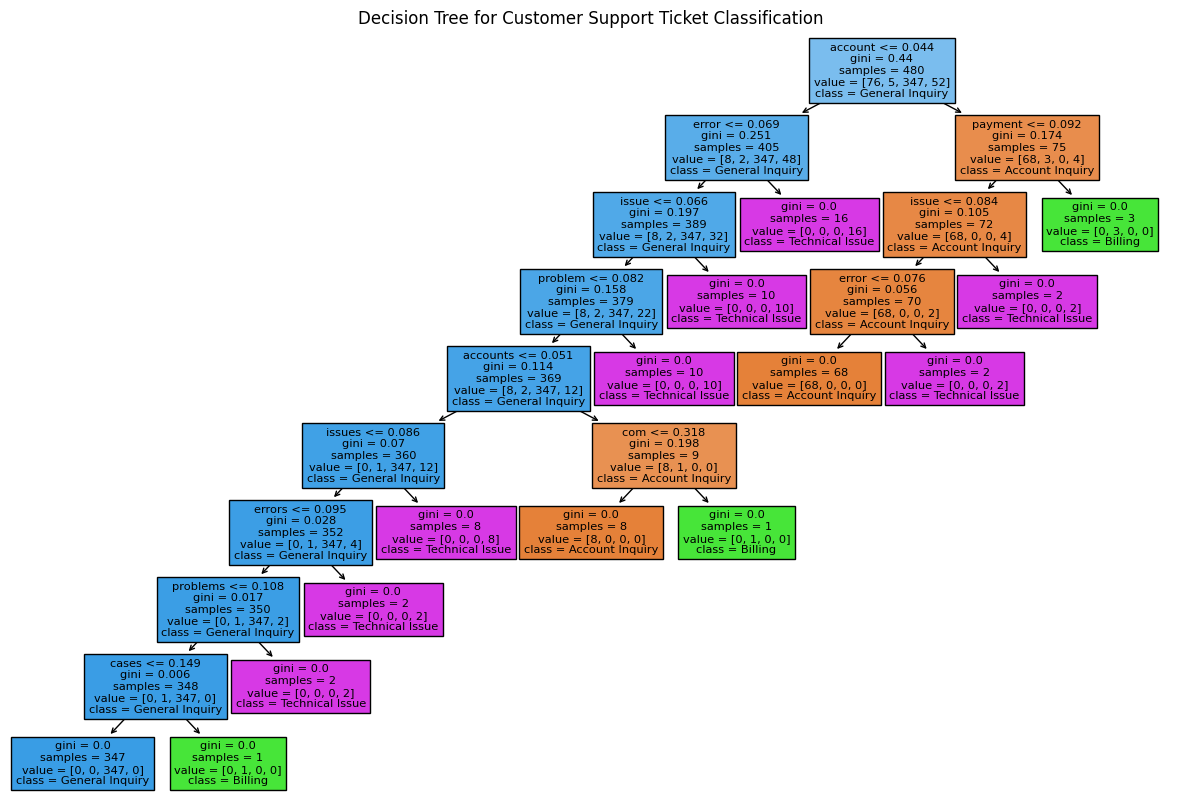

Model Accuracy: 98.06%


In [ ]:
# prompt: shrink node upto 10

# Train the Decision Tree Classifier with max_depth
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=decision_tree_model.classes_)
plt.title("Decision Tree for Customer Support Ticket Classification")
plt.show()

# Evaluate the model
accuracy = decision_tree_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
